<a href="https://colab.research.google.com/github/NagorskaWollejszo/dw_matrix/blob/master/dzien4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [0]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [0]:
ls data

men_shoes.csv


In [0]:
df = pd.read_csv('data/men_shoes.csv', low_memory=False)
df.shape

(18280, 48)

In [0]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [0]:
mean_price = np.mean ( df['prices_amountmin'])
mean_price

93.53952188183217

In [0]:
[3]*5

[3, 3, 3, 3, 3]

In [0]:
y_true = df['prices_amountmin']
y_true.shape[0]

18280

In [0]:
y_true = df['prices_amountmin']
y_pred = [mean_price] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

63.968341227870624

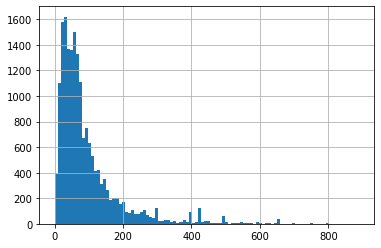

In [0]:
df['prices_amountmin'].hist(bins=100)

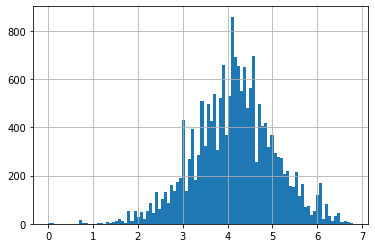

In [0]:
np.log( df['prices_amountmin'] + 1 ) .hist(bins=100)

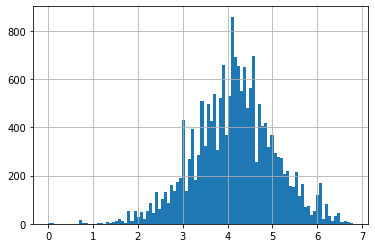

In [0]:
np.log1p( df['prices_amountmin'] ) .hist(bins=100)

In [0]:
np.log1p(0)

0.0

In [0]:
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.01120240700219

In [0]:
y_true = df['prices_amountmin']
price_log_mean = np.exp( np.mean( np.log1p(y_true) ) ) -1
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [0]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1( np.mean( np.log1p(y_true) ) )
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [0]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [0]:
df.brand.value_counts()

Nike                       1709
PUMA                        574
Ralph Lauren                524
New Balance                 361
VANS                        356
                           ... 
Iron Fist                     1
Shopzeus                      1
U.S. Polo Assn. Classic       1
Raywinter                     1
Montrail                      1
Name: brand, Length: 1856, dtype: int64

In [0]:
df['brand_cat'] = df['brand'].factorize()[0]

In [0]:
feats = ['brand_cat']
X = df[ feats ].values
y = df['prices_amountmin'].values

model = DecisionTreeRegressor(max_depth=5)

cross_val_score(model, X, y, scoring='neg_mean_absolute_error')

array([-57.89947522, -57.73227208, -52.50719535, -58.06843816,
       -65.72540391])

In [0]:
import sklearn
sklearn.metrics.SCORES.keys()

AttributeError: ignored

In [0]:
feats = ['brand_cat']
X = df[ feats ].values
y = df['prices_amountmin'].values

model = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [0]:
def run_model(feats):
 X = df[ feats ].values
 y = df['prices_amountmin'].values
 
 model = DecisionTreeRegressor(max_depth=5)
 
 scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
 return np.mean(scores), np.std(scores)

In [0]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [0]:
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]

In [0]:
feats = ['manufacturer_cat']
X = df[ feats ].values
y = df['prices_amountmin'].values

model = DecisionTreeRegressor(max_depth=5)

cross_val_score(model, X, y, scoring='neg_mean_absolute_error')

array([-64.01382959, -61.24878356, -57.77143235, -64.85814779,
       -67.7760531 ])

In [0]:
run_model(['manufacturer_cat'])

(-63.133649278023746, 3.394307434888982)

In [0]:
run_model(['manufacturer_cat', 'brand_cat'])

(-58.53930419908596, 4.31122323161543)

In [0]:
ls

data/         dzien4_meta.ipynb  HelloGithub.ipynb  matrix_one/
dzien4.ipynb  fdata/             LICENSE            README.md


In [0]:
!git config --global user.email "nagorska.wollejszo@gmail.com"
!git config --global user.name "NagorskaWollejszo"

In [0]:
ls

data/  fdata/  HelloGithub.ipynb  LICENSE  matrix_one/  README.md


In [0]:
!git add matrix_one/dzien4.ipynb

In [0]:
pwd

'/content/drive/My Drive/Colab Notebooks/dw_matrix'

In [0]:
!git status

On branch master
Your branch is ahead of 'origin/master' by 4 commits.
  (use "git push" to publish your local commits)

Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	modified:   matrix_one/dzien4.ipynb

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   .gitignore
	modified:   HelloGithub.ipynb
	deleted:    dzien4.ipynb
	modified:   matrix_one/dzien3.ipynb
	modified:   matrix_one/dzien3Female.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	matrix_one/dzien4_meta.ipynb



In [0]:
!git add matrix_one/dzien4.ipynb

In [0]:
!git commit -m "Dzień czwarty ogarniam dane"

[master f2b6aac] Dzień czwarty ogarniam dane
 1 file changed, 1 insertion(+), 1 deletion(-)


In [0]:
!git push

To https://github.com/NagorskaWollejszo/dw_matrix.git
 ! [rejected]        master -> master (fetch first)
error: failed to push some refs to 'https://242987dc5c5c361de914666bc566ecea9ec21cb0@github.com/NagorskaWollejszo/dw_matrix.git'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


In [0]:
ls

data/  fdata/  HelloGithub.ipynb  LICENSE  matrix_one/  README.md


In [0]:
cd matrix_one/

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_one


In [0]:
!git add dzien4.ipynb

In [108]:
!git commit -m "Dzień czwarty ogarniam dane"

[master 22967e8] Dzień czwarty ogarniam dane
 1 file changed, 1 insertion(+), 1 deletion(-)


In [109]:
!git status

On branch master
Your branch is ahead of 'origin/master' by 7 commits.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   ../.gitignore
	modified:   ../HelloGithub.ipynb
	deleted:    ../dzien4.ipynb
	modified:   dzien3.ipynb
	modified:   dzien3Female.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	dzien4_meta.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [114]:
!echo dzien4.ipynb

dzien4.ipynb


In [120]:
!git push

To https://github.com/NagorskaWollejszo/dw_matrix.git
 ! [rejected]        master -> master (fetch first)
error: failed to push some refs to 'https://48768c2cd21f4d19f061122d8e1bf82374c4e3ad@github.com/NagorskaWollejszo/dw_matrix.git'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.
